In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<h2>Kaggle Bike Sharing Demand Dataset</h2>

Modified 'count' to log1p(count) for training

Log can be used when target represents a count (that is non-negative values)

Model now predicts as log1p(count). We need to convert it back to actual count using expm1(predicted_target)

Reference:
https://www.kaggle.com/apapiu/predicting-bike-sharing-with-xgboost by Alexandru Papiu

To download dataset, sign-in and download from this link:
https://www.kaggle.com/c/bike-sharing-demand/data <br>


Input Features: ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']<br>
Target Feature: [<b>log1p('count')</b>]<br>
Objective: <quote>You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period (Ref: Kaggle.com)</quote>

In [2]:
# Example
# Converts to log1p(count)
# Print original count back using expm1
print('Test log and exp')
test_count = 100
print('original value', test_count)
x = np.log1p(test_count) # log (x+1)
print('log1p', x)
print('expm1', np.expm1(x)) # exp(x) - 1

Test log and exp
original value 100
log1p 4.61512051684126
expm1 100.00000000000003


In [3]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

In [4]:
df = pd.read_csv('data/train.csv', parse_dates=['datetime'],index_col=0)
df_test = pd.read_csv('data/test.csv', parse_dates=['datetime'],index_col=0)

In [5]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [6]:
add_features(df)
add_features(df_test)

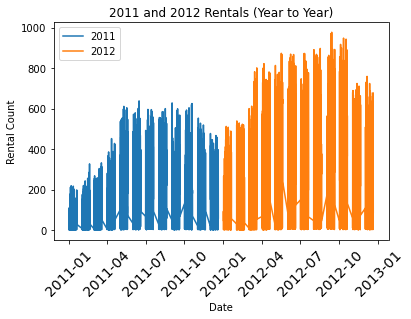

In [7]:
plt.plot(df.loc['2011']['count'],label='2011')
plt.plot(df.loc['2012']['count'],label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

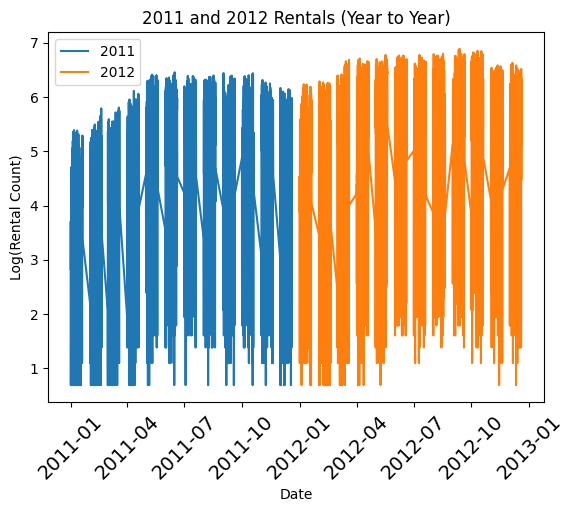

In [7]:
plt.plot(df.loc['2011']['count'].map(np.log1p),label='2011')
plt.plot(df.loc['2012']['count'].map(np.log1p),label='2012')
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Log(Rental Count)')
plt.title('2011 and 2012 Rentals (Year to Year)')
plt.legend()
plt.show()

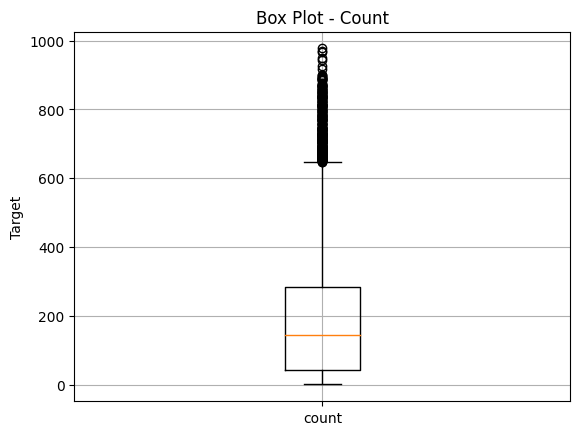

In [8]:
plt.boxplot([df['count']], labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

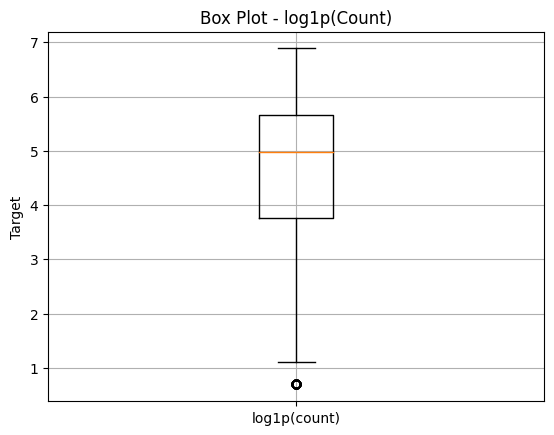

In [9]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
plt.boxplot([df['count'].map(np.log1p)], labels=['log1p(count)'])
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)

In [10]:
df["count"] = df["count"].map(np.log1p)

In [12]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [11]:
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [14]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count         float64
year            int64
month           int64
day             int64
dayofweek       int64
hour            int64
dtype: object

In [12]:
# Save all data
df.to_csv('out/bike_all.csv',index=True,index_label='datetime',columns=columns)

## Training and Validation Set
### Target Variable as first column followed by input features
### Training, Validation files do not have a column header

In [13]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [14]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [15]:
rows, train, test

(10886, 7620, 3266)

In [16]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [19]:
# Write Training Set
df.iloc[:train].to_csv('out/bike_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [20]:
# Write Validation Set
df.iloc[train:].to_csv('out/bike_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [21]:
# Test Data has only input features
df_test.to_csv('out/bike_test.csv',index=True,index_label='datetime')

In [22]:
print(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour


In [23]:
# Write Column List
with open('out/bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))